# Dependencies

In [1]:
import shutil, os
import time
from pathlib import Path
import pandas as pd
from PIL import Image

%pip install ultralytics albumentations
import ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 100.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

In [2]:
INPUT_DIR = "/kaggle/input"
WORKING_DIR = "/kaggle/working"

DATASET_INPUT_DIR = f"{INPUT_DIR}/master-data/dataset"
DATASET_WORKING_DIR = f"{WORKING_DIR}/dataset"

In [3]:
# enables caching for faster training
if os.path.isdir(DATASET_WORKING_DIR):
    shutil.rmtree(DATASET_WORKING_DIR)

shutil.copytree(DATASET_INPUT_DIR, DATASET_WORKING_DIR) 

'/kaggle/working/dataset'

# Experiment Configuration

The following cell can be adjusted to run the desired experiment.

In [4]:
SCENARIO = 1 # 1: tools, 2: hammers
EXPERIMENT_CONFIG = '1real'
# 1real, 2baseline, 3dr_mat, 4dr_bel, 5dr_dis0, 6dr_dis1, 7dr_hin0, 8dr_hin1, 9dr_mix, 10da_wct2_b, 11da_wct2_dr_hin1, 12da_fcut_dr_hin1
seeds = [1, 10, 42]

# Training

YOLOv8 is trained on specific experiment's synthetic training data for each seed previously defined in array seeds.

In [5]:
os.chdir(WORKING_DIR)

start_time = time.time()

for seed in seeds:
    print("----------------------------------------------------------------------------------")
    print(f"Start training for scenario {SCENARIO} {EXPERIMENT_CONFIG} with seed {seed}")
    intermediate_time = time.time()

    model = YOLO("yolov8m.pt")
    
    results = model.train(data=f"{DATASET_WORKING_DIR}/scenario{SCENARIO}/{EXPERIMENT_CONFIG}.yaml",
                          epochs=100,
                          imgsz=640,
                          project=f"train/scenario{SCENARIO}/{EXPERIMENT_CONFIG}",
                          name=f"seed{seed}",
                          seed=seed,
                          freeze=9,
                          exist_ok=True,
                          cache=True)

    
    elapsed_time = time.strftime("%H:%M:%S", time.gmtime(time.time() - intermediate_time))
    print(f'Training took {elapsed_time}')

elapsed_time = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f'Total took {elapsed_time}')
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
Start training for scenario 1 1real with seed 1
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset/scenario1/1real.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=9, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


train: Caching images (0.1GB RAM): 100% ━━━━━━━━━━━━ 100/100 66.7it/s 1.5s.7s
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 751.6±581.5 MB/s, size: 489.1 KB)
val: Scanning /kaggle/working/dataset/scenario1/1real/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 80.3Kit/s 0.0s
train: /kaggle/working/dataset/scenario1/1real/images/train/m_flickr_workshop100.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed2.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed6.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed62.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1r

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


val: Caching images (0.1GB RAM): 100% ━━━━━━━━━━━━ 100/100 62.3it/s 1.6s.3s
Plotting labels to /kaggle/working/train/scenario1/1real/seed1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/train/scenario1/1real/seed1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      3.12G      1.347       3.55      1.463         15        640: 100% ━━━━━━━━━━━━ 7/7 2.1it/s 3.3s0.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.8it/s 2.2s0.8ss
                   all        100        332      0.443      0.273      0.198     

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        100        332      0.977      0.979      0.994       0.93
                hammer          8          8      0.951          1      0.995      0.966
           screwdriver         45        120      0.991      0.972      0.993      0.907
                wrench         34        107      0.972      0.944      0.992      0.877
                pliers         57         97      0.994          1      0.995       0.97
Speed: 0.1ms preprocess, 9.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /kaggle/working/train/scenario1/1real/seed1
Training took 00:07:25
----------------------------------------------------------------------------------
Start training for scenario 1 1real with seed 10
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosai

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


train: Caching images (0.1GB RAM): 100% ━━━━━━━━━━━━ 100/100 67.0it/s 1.5s.3s
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 335.2±189.7 MB/s, size: 1687.7 KB)
val: Scanning /kaggle/working/dataset/scenario1/1real/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 38.2Kit/s 0.0s
train: /kaggle/working/dataset/scenario1/1real/images/train/m_flickr_workshop100.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed2.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed6.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed62.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1

Invalid SOS parameters for sequential JPEG


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
val: Caching images (0.0GB RAM): 61% ━━━━━━━───── 61/100 54.9it/s 1.0s<0.7ss

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


val: Caching images (0.1GB RAM): 100% ━━━━━━━━━━━━ 100/100 63.3it/s 1.6s.2s
Plotting labels to /kaggle/working/train/scenario1/1real/seed10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/train/scenario1/1real/seed10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      3.87G      1.394       4.12      1.461         15        640: 100% ━━━━━━━━━━━━ 7/7 2.9it/s 2.4s0.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.1it/s 1.9s0.9s
                   all        100        332      0.544      0.194      0.185    

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        100        332      0.979       0.98      0.993       0.93
                hammer          8          8      0.948          1      0.995      0.973
           screwdriver         45        120      0.983      0.957       0.99      0.892
                wrench         34        107       0.99      0.963      0.991      0.879
                pliers         57         97      0.994          1      0.995      0.977
Speed: 0.2ms preprocess, 9.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /kaggle/working/train/scenario1/1real/seed10
Training took 00:07:08
----------------------------------------------------------------------------------
Start training for scenario 1 1real with seed 42
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosa

Invalid SOS parameters for sequential JPEG


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
train: Caching images (0.0GB RAM): 49% ━━━━━╸────── 49/100 137.1it/s 0.1s<0.4s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


train: Caching images (0.1GB RAM): 100% ━━━━━━━━━━━━ 100/100 71.8it/s 1.4s.2s
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 395.5±204.0 MB/s, size: 458.5 KB)
val: Scanning /kaggle/working/dataset/scenario1/1real/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 112.3Kit/s 0.0s
train: /kaggle/working/dataset/scenario1/1real/images/train/m_flickr_workshop100.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed2.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed6.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1real/images/train/mixed62.jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/scenario1/1

Invalid SOS parameters for sequential JPEG


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
val: Caching images (0.0GB RAM): 61% ━━━━━━━───── 61/100 29.4it/s 1.9s<1.3s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


val: Caching images (0.1GB RAM): 100% ━━━━━━━━━━━━ 100/100 39.7it/s 2.5s.3s
Plotting labels to /kaggle/working/train/scenario1/1real/seed42/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/train/scenario1/1real/seed42
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      3.63G      1.377      3.799      1.461         15        640: 100% ━━━━━━━━━━━━ 7/7 2.8it/s 2.5s0.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.8it/s 1.4s0.7s
                   all        100        332      0.355      0.231      0.104    

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        100        332      0.984      0.971      0.993      0.923
                hammer          8          8      0.957          1      0.995      0.934
           screwdriver         45        120      0.983       0.94       0.99      0.908
                wrench         34        107          1      0.944      0.994      0.879
                pliers         57         97      0.997          1      0.995       0.97
Speed: 0.1ms preprocess, 12.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /kaggle/working/train/scenario1/1real/seed42
Training took 00:07:08
Total took 00:21:42
----------------------------------------------------------------------------------


# Evaluation
Evaluation on specific experiment's real test data for each previously trained model.

In [6]:
os.chdir(WORKING_DIR)

for seed in seeds:
    print("----------------------------------------------------------------------------------")
    eval_model = YOLO(f"train/scenario{SCENARIO}/{EXPERIMENT_CONFIG}/seed{seed}/weights/last.pt")
    metrics = eval_model.val(
        data=f"{DATASET_WORKING_DIR}/scenario{SCENARIO}/{EXPERIMENT_CONFIG}.yaml",
        split="test",
        imgsz=640,
        plots=True,
        exist_ok=True,
        save_json=True,
        project=f"eval/scenario{SCENARIO}/{EXPERIMENT_CONFIG}",
        name=f"seed{seed}"
    )

----------------------------------------------------------------------------------
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 69.3±52.1 MB/s, size: 392.7 KB)
val: Scanning /kaggle/working/dataset/scenario1/test/labels... 96 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 96/96 131.3it/s 0.7s.2ss
val: /kaggle/working/dataset/scenario1/test/images/mixed69.jpg: corrupt JPEG restored and saved
val: /kaggle/working/dataset/scenario1/test/images/mixed72.jpg: corrupt JPEG restored and saved
val: /kaggle/working/dataset/scenario1/test/images/mixed84.jpg: corrupt JPEG restored and saved
val: New cache created: /kaggle/working/dataset/scenario1/test/labels.cache


Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 17% ━━────────── 1/6 0.6it/s 0.5s<8.7s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 33% ━━━━──────── 2/6 0.6it/s 1.8s<6.3s

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 50% ━━━━━━────── 3/6 0.8it/s 2.7s<3.9s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 67% ━━━━━━━━──── 4/6 0.9it/s 3.5s<2.1s

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.5it/s 4.0s0.5s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         96        693      0.547      0.348      0.396      0.224
                hammer         85        139        0.5     0.0504      0.129     0.0749
           screwdriver         30        192      0.478      0.448      0.489      0.256
                wrench         17        181      0.489      0.402      0.355       0.19
                pliers         34        181      0.719      0.492      0.612      0.375
Speed: 3.7ms preprocess, 14.2ms inference, 0.0ms loss, 4.1ms postprocess per image
Saving /kaggle/working/eval/scenario1/1real/seed1/predictions.json...
Results saved to /kaggle/working/eval/scenario1/1real/seed1
----------------------------------------------------------------------------------
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2888.0±1003.1 MB/s, size: 384.0 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 17% ━━────────── 1/6 0.4it/s 0.7s<12.4s

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 33% ━━━━──────── 2/6 0.6it/s 1.7s<6.9s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 50% ━━━━━━────── 3/6 0.7it/s 2.7s<4.2s

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.6it/s 3.8s0.5s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         96        693      0.558      0.319      0.376      0.222
                hammer         85        139      0.375    0.00719       0.11     0.0755
           screwdriver         30        192      0.536      0.421      0.443       0.24
                wrench         17        181      0.598      0.346      0.348      0.192
                pliers         34        181      0.723      0.503      0.606       0.38
Speed: 3.2ms preprocess, 9.9ms inference, 0.1ms loss, 5.2ms postprocess per image
Saving /kaggle/working/eval/scenario1/1real/seed10/predictions.json...
Results saved to /kaggle/working/eval/scenario1/1real/seed10
----------------------------------------------------------------------------------
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2943.5±1135.1 MB/s, size: 1719.

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 17% ━━────────── 1/6 0.4it/s 0.7s<11.6s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 33% ━━━━──────── 2/6 0.6it/s 1.6s<6.4s

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 50% ━━━━━━────── 3/6 0.8it/s 2.4s<3.7s

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 67% ━━━━━━━━──── 4/6 1.0it/s 3.1s<1.9s

Invalid SOS parameters for sequential JPEG


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.7it/s 3.6s0.5s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         96        693      0.457      0.349      0.375      0.219
                hammer         85        139      0.324      0.036     0.0829      0.043
           screwdriver         30        192      0.465      0.467      0.477      0.269
                wrench         17        181      0.358      0.372      0.333       0.18
                pliers         34        181      0.679      0.519      0.606      0.383
Speed: 4.2ms preprocess, 9.0ms inference, 0.0ms loss, 4.9ms postprocess per image
Saving /kaggle/working/eval/scenario1/1real/seed42/predictions.json...
Results saved to /kaggle/working/eval/scenario1/1real/seed42


# Inference

This section is for inference on selected images of the specific experiment's test data.

## Inference Configuration
One model that was previously trained must be specified using the seed. Additionally, the specific image of the test data which the model should infer on must be specified.

In [13]:
seed = 1

image_file = "wikimgs_construction794.jpg"
#image_file = "42792047161_9cf2029374_z.jpg"

## Run Inference


image 1/1 /kaggle/working/dataset/scenario1/test/images/wikimgs_construction794.jpg: 448x640 5 screwdrivers, 3 plierss, 42.9ms
Speed: 2.1ms preprocess, 42.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /kaggle/working/infer/scenario1/1real


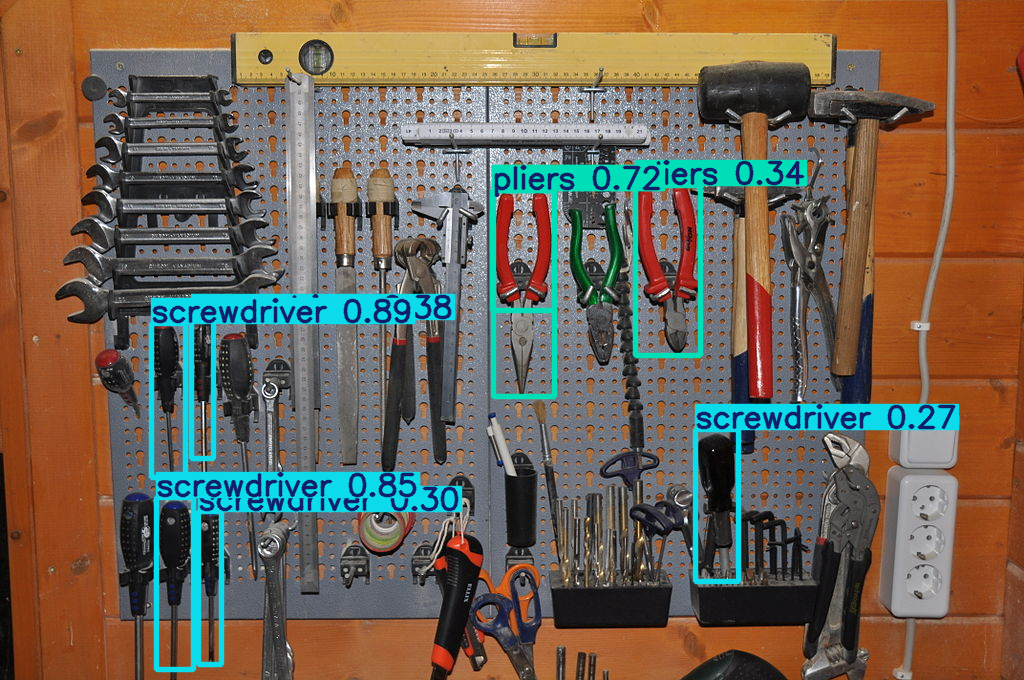

In [14]:
os.chdir(WORKING_DIR)

infer_model = YOLO(f"train/scenario{SCENARIO}/{EXPERIMENT_CONFIG}/seed{seed}/weights/last.pt")

file_path = f"{DATASET_WORKING_DIR}/scenario{SCENARIO}/test/images"
image_path = f"{file_path}/{image_file}"

w, h = Image.open(image_path).size

results = infer_model.predict(image_path,
                              save=True,
                              imgsz=640,
                              project=f"infer/scenario{SCENARIO}",
                              name=f"{EXPERIMENT_CONFIG}",
                              exist_ok=True)

for result in results:
    boxes = result.boxes
    result.show()

# Clean Up

In [ ]:
# clear output/working dir
for name in os.listdir(WORKING_DIR):
    path = os.path.join(WORKING_DIR, name)
    if os.path.isfile(path) or os.path.islink(path):
        os.unlink(path)
    else:
        shutil.rmtree(path)